# XGBoost
　XGBoostのサンプルプログラム.  
ドキュメント：https://xgboost.readthedocs.io/en/latest/python/python_api.html  
 XGBoostの理論を知りたい人へのドキュメント：https://xgboost.readthedocs.io/en/latest/tutorials/model.html

## Import

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import datasets

Pythonのバージョン

In [2]:
import sys
sys.version

'3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]'

xgboostのバージョン

In [3]:
xgb.__version__

'1.2.0'

## Setting

In [4]:
# Path
input_path = "../input_data/"

# Set Display Max Columns
pd.set_option("display.max_columns", 50)

%matplotlib inline

## Read Data and Make Data

In [5]:
# Train
train = pd.read_csv(
    input_path + "bank/train.csv",
    sep = ",",
    header = 0,
    quotechar = "\""
)
train = pd.get_dummies(train, drop_first=True) # drop_first=Trueでk-1個のダミー変数となる

# Test
test = pd.read_csv(
    input_path + "bank/test.csv",
    sep = ",",
    header = 0,
    quotechar = "\""
)

test = pd.get_dummies(test, drop_first=True) # drop_first=Trueでk-1個のダミー変数となる

In [6]:
# 説明変数
train_x = train.copy()
del train_x["y"]

# 目的変数
train_y = train["y"].tolist()

　XGBoostの関数に入れる形に整形.

In [7]:
dtrain = xgb.DMatrix(train_x, label = train_y)

## Cross Validation
　CVで最適な学習回数を求める.

In [8]:
seed_num = 17                       # ランダムシードの固定
params={
    "booster": "gbtree",
    "nthread": 3,                   # 使用するスレッド数
    "objective": "binary:logistic", # バイナリ予測で確率出力
    "eval_metric": "auc",           # 確認する評価指標(これを最適化しているわけではない)
    "eta": 0.1,                     # 学習率
    "max_depth": 5,                 # 1回に作る木の深さ
    "min_child_weight": 10,         # 最小ノード数
    "subsample": 0.7,               # 1回に使う学習データ割合(毎回ランダムに決定)
    "colsample_bytree": 0.6,        # 1回に使う説明変数の割合(毎回ランダムに決定)
    "seed": seed_num                # ランダムシードの固定
}

In [9]:
xgb_cv = xgb.cv(
    params,
    dtrain,
    num_boost_round = 200, # 探索する学習回数
    nfold = 5,             # クロスバリデーション数
    verbose_eval = True
)

[0]	train-auc:0.83823+0.00509	test-auc:0.83132+0.00869
[1]	train-auc:0.87166+0.00512	test-auc:0.86676+0.00509
[2]	train-auc:0.88692+0.00389	test-auc:0.88113+0.00585
[3]	train-auc:0.89265+0.00695	test-auc:0.88554+0.00922
[4]	train-auc:0.90194+0.00555	test-auc:0.89518+0.00764
[5]	train-auc:0.90673+0.00409	test-auc:0.89986+0.00540
[6]	train-auc:0.90735+0.00353	test-auc:0.90028+0.00705
[7]	train-auc:0.90865+0.00402	test-auc:0.90191+0.00857
[8]	train-auc:0.90945+0.00266	test-auc:0.90270+0.00853
[9]	train-auc:0.91117+0.00388	test-auc:0.90418+0.00787
[10]	train-auc:0.91083+0.00358	test-auc:0.90367+0.00837
[11]	train-auc:0.91251+0.00241	test-auc:0.90482+0.00841
[12]	train-auc:0.91326+0.00210	test-auc:0.90529+0.00911
[13]	train-auc:0.91596+0.00182	test-auc:0.90808+0.00744
[14]	train-auc:0.91701+0.00137	test-auc:0.90889+0.00807
[15]	train-auc:0.91825+0.00111	test-auc:0.91024+0.00734
[16]	train-auc:0.91880+0.00123	test-auc:0.91102+0.00671
[17]	train-auc:0.91944+0.00132	test-auc:0.91136+0.00637
[1

[146]	train-auc:0.95000+0.00095	test-auc:0.92786+0.00615
[147]	train-auc:0.95017+0.00096	test-auc:0.92784+0.00620
[148]	train-auc:0.95029+0.00098	test-auc:0.92788+0.00623
[149]	train-auc:0.95040+0.00098	test-auc:0.92783+0.00618
[150]	train-auc:0.95048+0.00099	test-auc:0.92788+0.00615
[151]	train-auc:0.95060+0.00100	test-auc:0.92793+0.00606
[152]	train-auc:0.95072+0.00099	test-auc:0.92791+0.00607
[153]	train-auc:0.95082+0.00095	test-auc:0.92788+0.00604
[154]	train-auc:0.95093+0.00096	test-auc:0.92792+0.00601
[155]	train-auc:0.95107+0.00090	test-auc:0.92787+0.00603
[156]	train-auc:0.95121+0.00090	test-auc:0.92786+0.00598
[157]	train-auc:0.95135+0.00086	test-auc:0.92785+0.00598
[158]	train-auc:0.95143+0.00084	test-auc:0.92784+0.00597
[159]	train-auc:0.95156+0.00087	test-auc:0.92786+0.00592
[160]	train-auc:0.95170+0.00080	test-auc:0.92784+0.00592
[161]	train-auc:0.95181+0.00082	test-auc:0.92789+0.00595
[162]	train-auc:0.95189+0.00082	test-auc:0.92788+0.00598
[163]	train-auc:0.95203+0.00084

　検証データでのAUCが最大となる学習回数を取得

In [10]:
xgb_cv["test-auc-mean"].max()

0.9281998000000001

In [11]:
nrounds = xgb_cv["test-auc-mean"].idxmax() + 1
nrounds

195

## Training

In [12]:
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round = nrounds
)

## Check Importance
　変数重要度の確認. 下記はリファレンスより抜粋.  
importance_type (str, default "weight") –  
How the importance is calculated: either “weight”, “gain”, or “cover”  
- ”weight” is the number of times a feature appears in a tree
- ”gain” is the average gain of splits which use the feature
- ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split  
gainについての解説：https://xgboost.readthedocs.io/en/latest/tutorials/model.html#learn-the-tree-structure

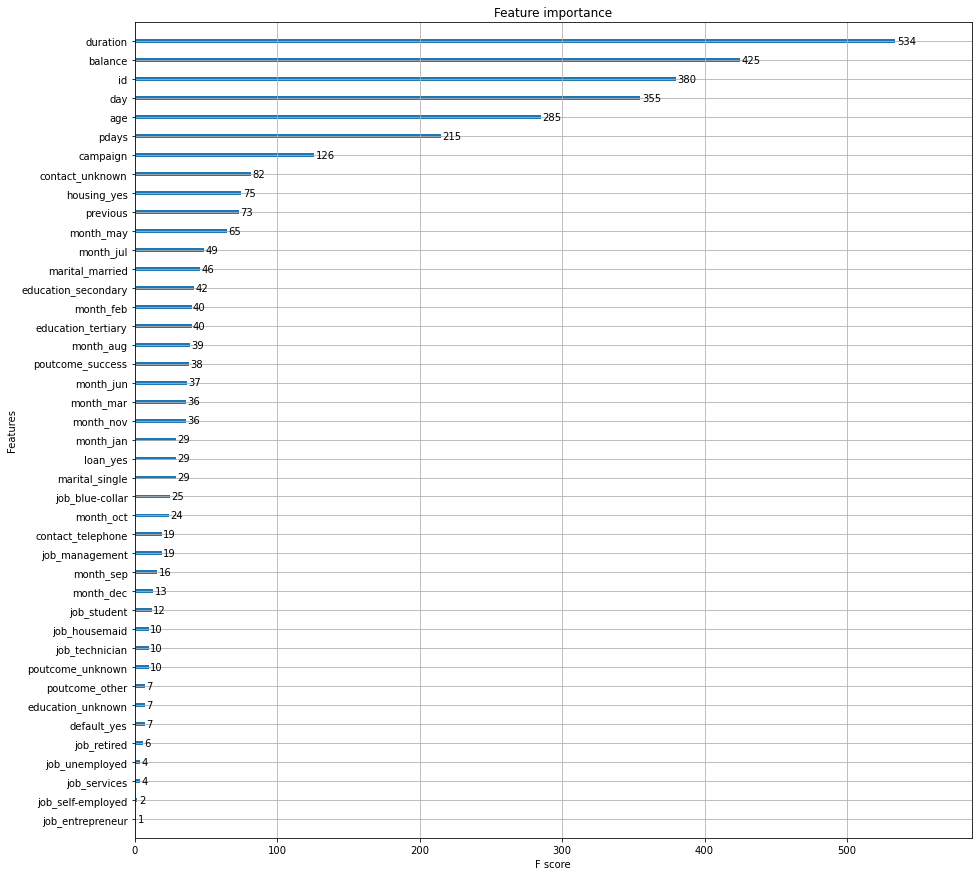

In [13]:
xgb.plot_importance(xgb_model, importance_type="weight").figure.set_size_inches(15, 15)

## Predict

In [14]:
dtest = xgb.DMatrix(test)
submit= pd.DataFrame(xgb_model.predict(dtest), columns = ["y"])
submit["id"] = test["id"]

## Output

In [15]:
submit[["id", "y"]].to_csv(
    "../submit/submit_xgb.csv",
    sep = ",",
    index = False,
    header = False
)